# Homework, Week 20, Heather Leighton-Dick

## 1.	Write a python program (not a Jupyter notebook, but a py file you run from the command line) that accepts the cats_txt.txt file as input and counts the frequency of all words and punctuation in that text file, ordered by frequency. Make sure to handle capital and lowercase versions of words and count them together.

### https://github.com/HeatherLD/Homework20/tree/main/Homework20map_reduce

## 2.	Document how to run the program you created in question 1 in a readme.md file in your repo. Be as clear as possible. Use proper markdown, and consider using screenshots. Be sure to briefly discuss why this kind of exercise might be helpful for NLP in your markdown.

### https://github.com/HeatherLD/Homework20/blob/main/README.md

## 3.	Load the tokenized Paradise Lost from the Gutenberg Corpus in NLTK.* https://www.nltk.org/book/ch02.html . Stem or lemmatize the words and find counts. Select the top 20 words and create a histogram. Exclude stop words and make sure you are including words of all capitalizations in your count. If there are any meaningless “words” (“thus” and single letters, etc.) that are produced in your list or top words, alter your logic to exclude them. Specify why you chose stemming or lemmatization.

In [2]:
#the kitchen sink
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import ssl
from collections import Counter
from nltk.corpus import gutenberg
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
#nltk.download('wordnet')
#nltk.download('omw-1.4')
#nltk.corpus.gutenberg.fileids()
#nltk.download('punkt')

In [3]:
#load Paradise Lost, remove title
paradise_words = nltk.corpus.gutenberg.words("milton-paradise.txt")
paradise_words = paradise_words[10:-1]
print(paradise_words[0])
#print(type(paradise))

Of


In [4]:
#nltk.download('stopwords')
sw = set(nltk.corpus.stopwords.words('english'))
print(type(sw))

<class 'set'>


In [5]:
#list of older English suffixes, words, and versions of "you/thou"
old_Eng = ["st", "th", "Th", "thou", "thee", "thither", "yon", "hither", "thus", "Said", "thy", "hath", "erewhile", "er", "ye", "oft", "thence"]

In [6]:
#filtering out stop words, older English suffixes etc., and punctuation

filtered_list = [w for w in paradise_words if w.lower() not in sw]
paradise_filter1 = [w for w in filtered_list if w.isalnum()]
paradise_filtered = [w for w in paradise_filter1 if w not in old_Eng]

print(len(paradise_filtered))

43812


### I chose lemmatization because I would rather have full words as results instead of pieces or over-truncated words, even though lemmatization takes longer. Older English might have minor differences in spelling from modern words, and I didn't want to take the risk that the algorithm would just cut part off and create a separate group/count for those words.

In [7]:
#lemmatization

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(paradise_filtered):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(paradise_filtered)]

pfdf = pd.DataFrame(paradise_filtered, columns=['text'])
pfdf['text_lemmatized'] = pfdf.text.apply(lemmatize_text)
print(pfdf.head())

           text text_lemmatized
0           Man           [Man]
1         first         [first]
2  disobedience  [disobedience]
3         fruit         [fruit]
4     forbidden     [forbidden]


In [8]:

#lowercase all the words and create a bag of words
lower_para = [w.lower() for w in paradise_filtered]

paradise_bag = Counter(lower_para)

print(paradise_bag.most_common(20))

paradise_common = paradise_bag.most_common(20)
#type(paradise_common)

[('heaven', 419), ('shall', 283), ('god', 260), ('yet', 228), ('earth', 217), ('though', 217), ('us', 187), ('man', 176), ('first', 175), ('high', 153), ('one', 142), ('far', 129), ('death', 126), ('may', 126), ('great', 123), ('till', 120), ('day', 120), ('hell', 119), ('like', 118), ('stood', 110)]


### The histogram below shows the frequency of words that have counts of certain amounts; for example, there is one word in Paradise Lost that appears 400 times or more, one word that appears more than 250 times, etc. Not surprisingly, the word that appears most often, at a count of 419, is "heaven."

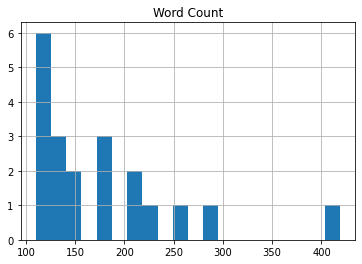

In [9]:
paradise20df = pd.DataFrame(paradise_common, columns=["word", "count"])

#histogram of 20 most common words
ax = paradise20df.hist(column="count", bins=20)
ax = ax[0]
for x in ax:
    x.set_title("Word Count")

## 4.	Perform Vader Sentiment Analysis on the book. Find the 5 most negative, 5 most positive, and 5 most neutral sentences in Paradise Lost*. http://www.nltk.org/howto/sentiment.html . This may take a while to run, so you can always start with a small subset of the data (100 sentences) and then once your code works as expected, expand it to the whole book and let it run.

In [10]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

from sklearn.model_selection import train_test_split
import joblib
from sklearn.feature_extraction.text import CountVectorizer
#nltk.download('vader_lexicon')

In [12]:
#divide Paradise_Lost into sentences for analysis and filter out punc, Old English, and stop words
paradise_sents = nltk.corpus.gutenberg.sents("milton-paradise.txt")
paradise_sents = paradise_sents[2:-1]
#print(len(paradise_sents[1]))
#paradise_sent1 = paradise_sents[0]
#' '.join(paradise_sent1)

import nltk,math
# explicitly make list, then LazySequence will traverse all items
sentences = [sentence for sentence in nltk.corpus.gutenberg.sents("milton-paradise.txt")[2:-1]]
i = math.floor(len(sentences)*0.2)

In [13]:
#sentences = nltk.corpus.gutenberg.sents("milton-paradise.txt")

sentence_list = []

for i in range(len(sentences)):
    temp_list = []
    sentences[i] = ' '.join(word for word in sentences[i])
    sentences[i] = sentences[i].replace(" ,", ",")
    sentences[i] = sentences[i].replace(" ;", ";")
    sentences[i] = sentences[i].replace(" :", ":")
    sentences[i] = sentences[i].replace(" !", "!")
    sentences[i] = sentences[i].replace(" ?", "?")
    sentences[i] = sentences[i].replace(" - ", "-")
    sentences[i] = sentences[i].replace(" .", ".")
    sentences[i] = sentences[i].replace(" ' ", " '")
    sentences[i] = sentences[i].replace("( ", "(")
    sentences[i] = sentences[i].replace(" )", ")")
    sentences[i] = sentences[i].replace(" 's", "'s")

    temp_list.append(sentences[i])
    
    sentence_list.append(temp_list)
    
#print(sentence_list)



In [60]:
#make a dataframe from the list of lists
sldf = pd.DataFrame(sentence_list, columns=['sentence'])

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize

#instantiate Vader
vader = SentimentIntensityAnalyzer()

#add a column with the Vader score
sldf['score'] = sldf['sentence'].apply(lambda x: vader.polarity_scores(x)['compound'])
#print(sldf.head())

#find the top 5 scores, the lowest 5 scores, and the 5 scores closest to 0

top5 = sldf.nlargest(5, 'score', keep='all')
print(top5)

                                               sentence   score
503   Beneath him with new wonder now he views, To a...  0.9970
445   Round he surveys (and well might, where he sto...  0.9969
505   Not that fair field Of Enna, where Proserpine ...  0.9967
1841  This having learned, thou hast attained the su...  0.9961
1111  Mine eyes he closed, but open left the cell Of...  0.9949


In [58]:
low5 = sldf.nsmallest(5, 'score', keep='all')
print(low5)

                                               sentence   score
1817  For this he shall live hated, be blasphemed, S... -0.9959
464   that now, While time was, our first parents ha... -0.9952
277   Through many a dark and dreary vale They passe... -0.9899
1592  But if thou judge it hard and difficult, Conve... -0.9895
1477  He, after Eve seduced, unminded slunk Into the... -0.9889


In [57]:
neutral5 = sldf[sldf['score'].between(-0.05, 0.05)]
print(neutral5)

                                               sentence  score
11       Oh how unlike the place from whence they fell!    0.0
25                                             But see!    0.0
31    Him, haply slumbering on the Norway foam, The ...    0.0
35         Such resting found the sole Of unblest feet.    0.0
57                Awake, arise, or be for ever fallen!"    0.0
...                                                 ...    ...
1814                              To whom thus Michael.    0.0
1826       Who then shall guide His people, who defend?    0.0
1835              He ended; and thus Adam last replied.    0.0
1836  How soon hath thy prediction, Seer blest, Meas...    0.0
1840          To whom thus also the Angel last replied.    0.0

[256 rows x 2 columns]


## 5.	Explain your findings from the previous question. Are the sentences and their sentiment analysis scores correct? Explain why or why not.

### Vader polarity scores are valences which vary between -4 and 4, with 0 as a neutral score. You can figure the valence for each word or you can use a "compound" score which is calcuated by summing the valences of a word as it appears throughout the text and then normalizing that sum to fall between -1 and 1. I used the compound score for simplicity.

### Overall, Vader didn't do such a bad job of classifying positive and negative sentiment. The "positive" sentences contained words like "wonder", "well", and "fair", although "well", as used in the phrase "well might", is an older English construction which means it would be understandable or beneficial to do or think something ("as you well might think, my good sir"). The "negative" sentences were far more clear cut, including words like "hated", "blasphemed", "dark and dreary", and "slunk".

### On the whole, the neutral sentences seemed like exclamations or factual statements, so Vader did fairly well there too.

## Natural Language Processing Certificate
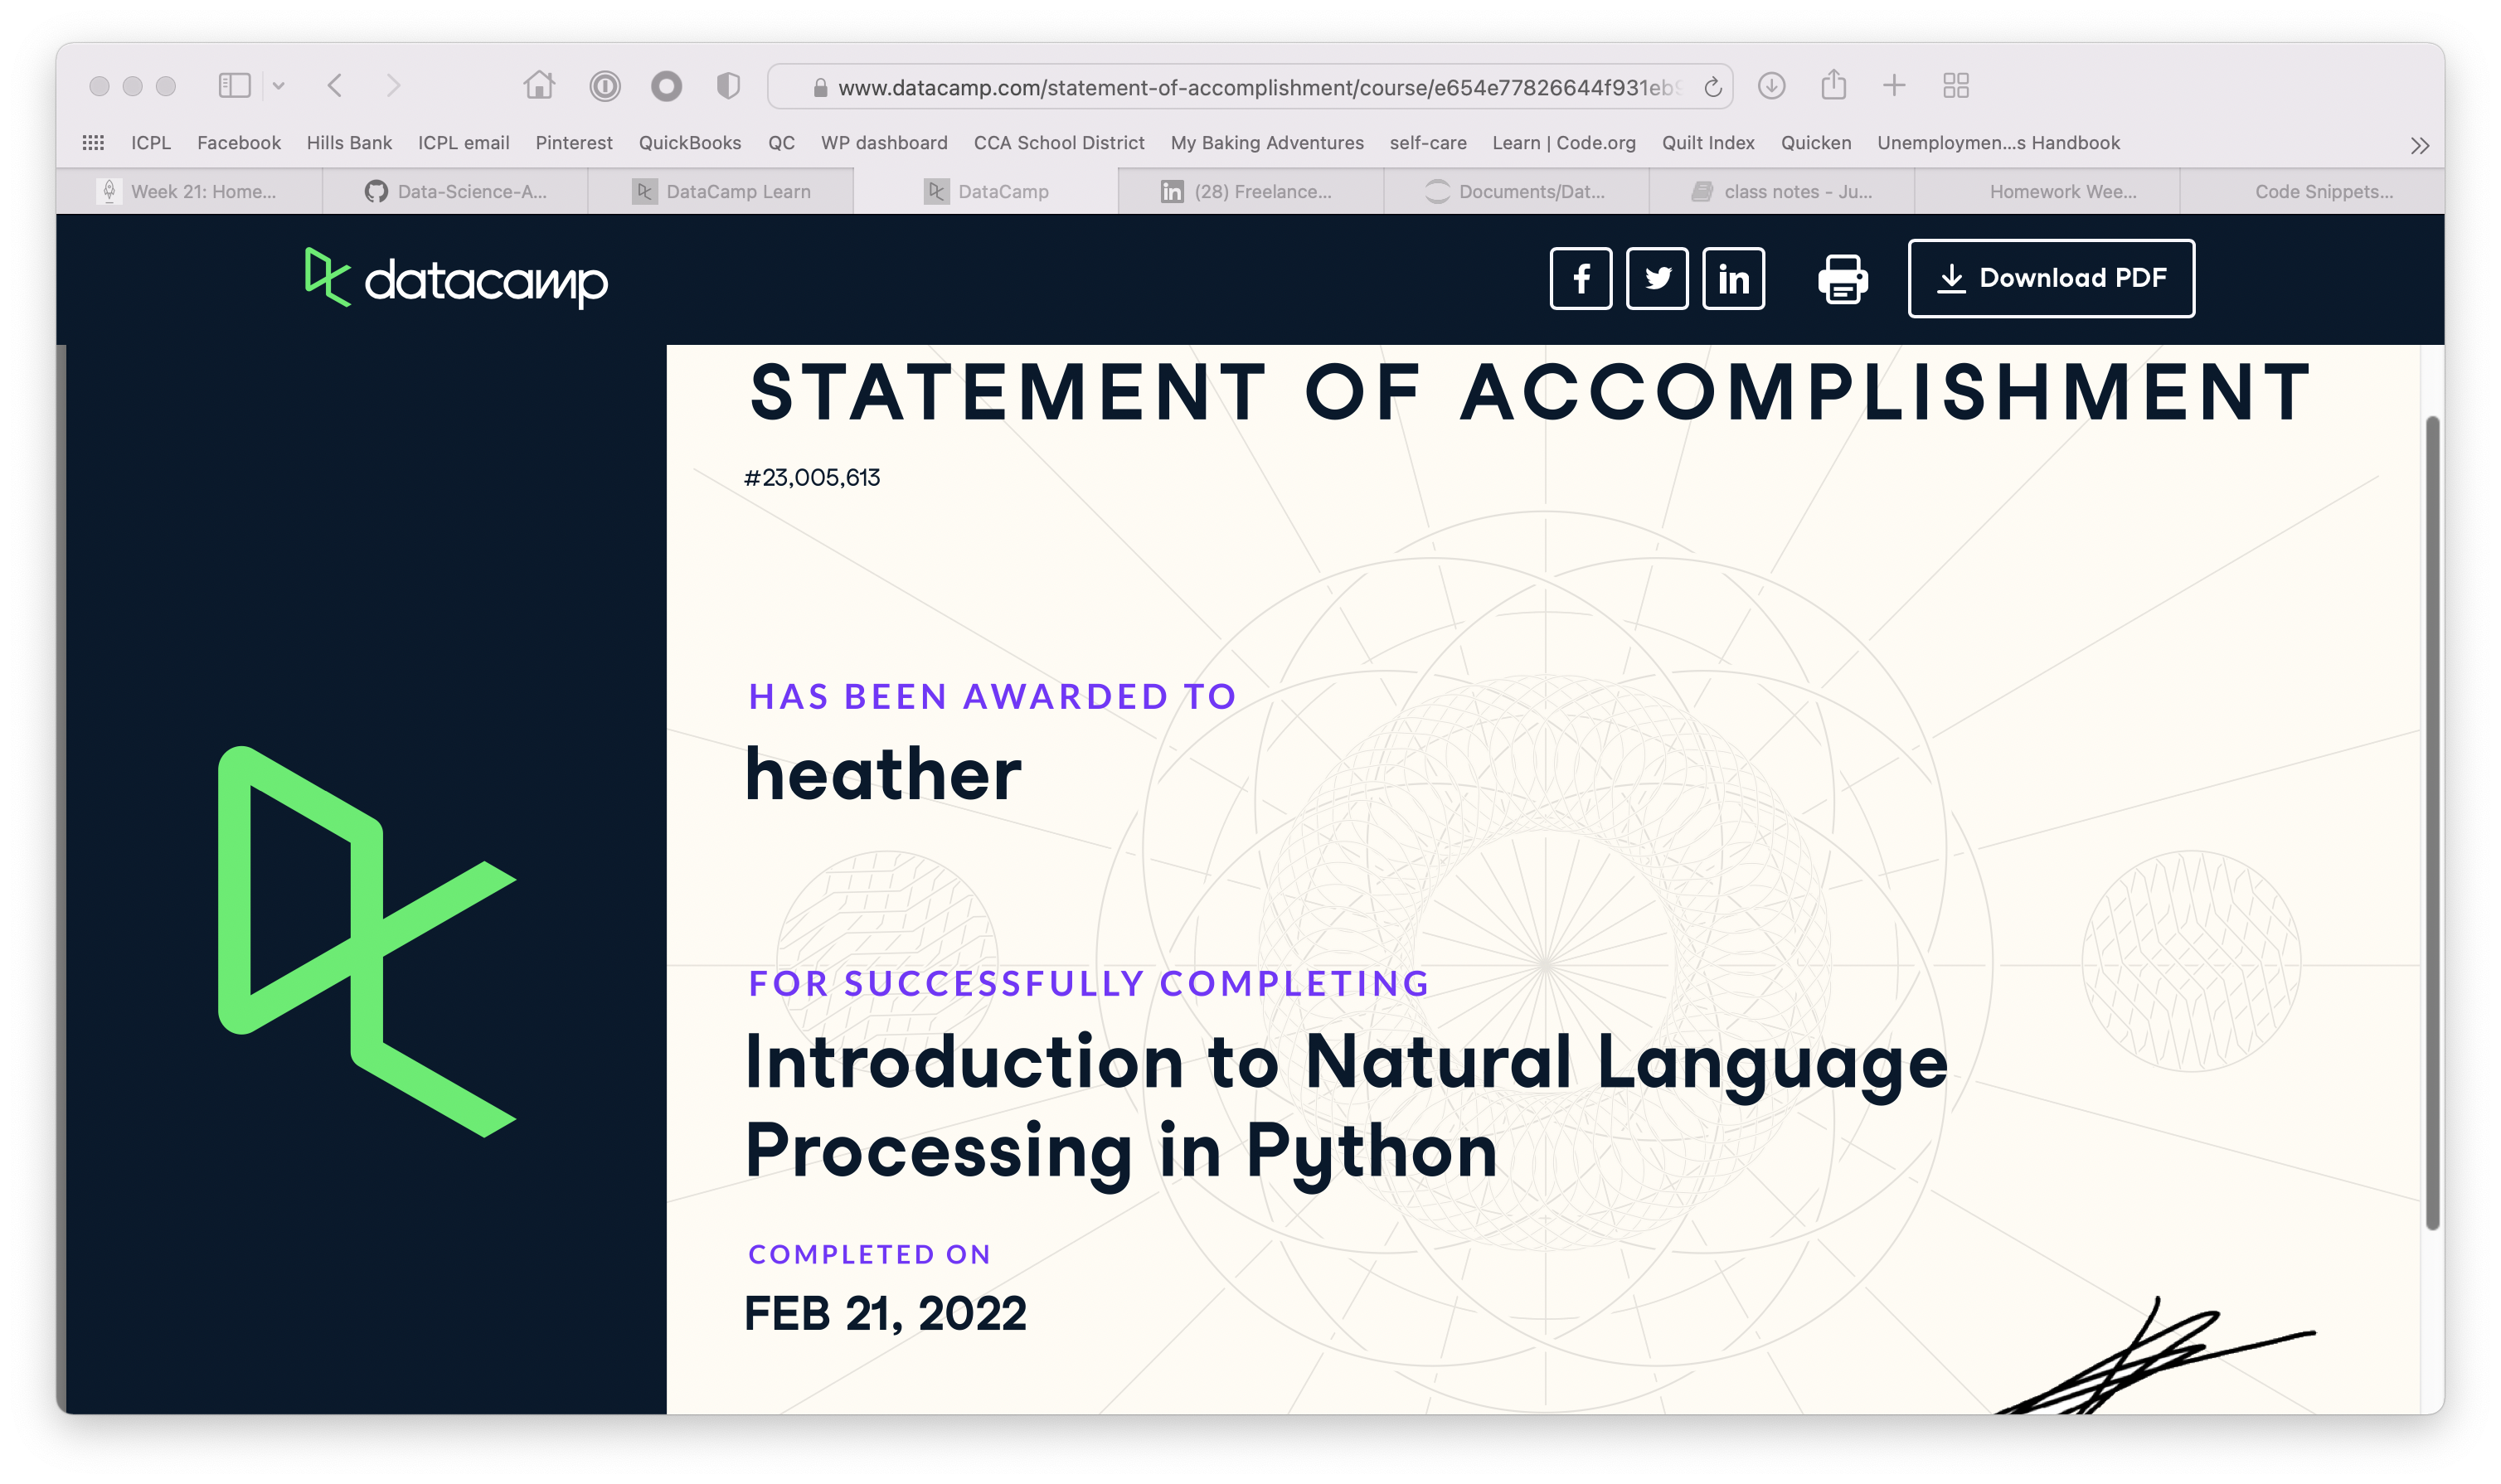